In [ ]:
import numpy as np
import xarray as xr
import hvplot.xarray
import panel as pn
import pandas as pd

import geoviews_tools as gt
import surface_panels_quick_dirty as spqd

In [ ]:
pn.pane.Markdown('''# Yatir Parameterizaton WRF results

A collection of plots showing WRF-simulated surface energy and carbon fluxes for
two different simulations of Yatir Forest in Israel.  The first WRF run is a 
control run using 'out of the box' NOAH-MP land surface parameterizations derived 
from MODIS land cover types.  The second WRF run is an experimental run that set 
a 15-km radius surrounding Yatir Forest to a lower albedo and higher surface 
roughness length relative to both the open shrubland PFT that occupies the 
area in the control run as well as the desert surrounding the forest.
''').servable()

Click the link for a live online interactive version: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Timothy-W-Hilton/yatir_viz_self_contained/dashboard?filepath=yatir_visualization.ipynb)

[![badge](https://img.shields.io/badge/launch-dashboard-579ACA.svg?logo=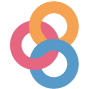)](https://mybinder.org/v2/gh/Timothy-W-Hilton/yatir_viz_self_contained/dashboard?urlpath=/proxy/5006/yatir_visualization)

In [ ]:
# use local data
ctlday, ytrday, ctl_minus_ytr = gt.merge_yatir_fluxes_landuse(
    fname_ctl='./ctl_d03_VWCx2_postprocessed.nc',
    fname_yatir='./ytr_d03_VWCx2_postprocessed.nc')

In [ ]:
ds_diff = xr.concat([ctlday, ytrday, ctl_minus_ytr], 
                    dim=pd.Index(['yatir dry', 'yatir wet', 'Yatir dry - Yatir wet'], name='WRFrun'))

In [ ]:
# make bottom_top_stag, bottom_top into coordinate variables
ds_diff = ds_diff.assign_coords({'bottom_top_stag': np.arange(ds_diff.dims['bottom_top_stag'])})
ds_diff = ds_diff.assign_coords({'bottom_top': np.arange(ds_diff.dims['bottom_top'])})
# set 'long_name' attribute to match description
ds_diff = gt.set_attributes_for_plotting(ds_diff)

yatir_idx = 21  # list(ds_diff['PFT'].values).index('Yatir')  
#ds_diff = ds_diff.assign(yatir_mask=ds_diff.sel(WRFrun='yatir dry')['LU_INDEX'] == yatir_idx)

In [ ]:
spqd.three_panel_quadmesh_compare_vertical_var(ds_diff, 'W', cmap='PRGn').servable()

In [ ]:
spqd.three_panel_quadmesh_compare_vertical_var(ds_diff, 'theta', cmap='Blues').servable()

In [ ]:
spqd.three_panel_quadmesh_compare_surface_var(ds_diff, 'FSA', cmap='Reds').servable()

In [ ]:
spqd.three_panel_quadmesh_compare_surface_var(ds_diff, 'FIRA', cmap='Reds').servable()

In [ ]:
spqd.three_panel_quadmesh_compare_surface_var(ds_diff, 'HFX', cmap='Reds').servable()

In [ ]:
spqd.three_panel_quadmesh_compare_surface_var(ds_diff, 'LH', cmap='Blues').servable()